#1. INITIAL SETUP.

##1.1 Install packages.

In [37]:
pip install pandas;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##1.2 Import packages.

In [42]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import requests
import json
import seaborn as sns
from numpy import nan as NA
import matplotlib.pyplot as plt
import geopy
from sklearn import linear_model
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
import sqlite3
import sqlalchemy as sqla
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

#2. DATA CLEANING FOR OUR STUDIES.


##2.1 Define function that create dataframe based on JSON API and limit.

In [43]:
def json2dataframe(url="", limit=""):
    """Take url and limit and format it to return to the data and dataframe"""
    url = url
    resp = requests.get(f"{url}?$limit={limit}")
    resp.raise_for_status()
    return pd.DataFrame(resp.json())

##2.2 Get dataframe for shooting historic data and overlook of the data. Dimension of the orinial dataframe (25596, 24).

In [44]:
dataframeShootingsince06 = json2dataframe('https://data.cityofnewyork.us/resource/833y-fsy8.json', 50000)
dataframeShootingsince06.shape
dataframeShootingsince06.head()

incident_key               occur_date occur_time      boro precinct  \
0    236168668  2021-11-11T00:00:00.000   15:04:00  BROOKLYN       79   
1    231008085  2021-07-16T00:00:00.000   22:05:00  BROOKLYN       72   
2    230717903  2021-07-11T00:00:00.000   01:09:00  BROOKLYN       79   
3    237712309  2021-12-11T00:00:00.000   13:42:00  BROOKLYN       81   
4    224465521  2021-02-16T00:00:00.000   20:00:00    QUEENS      113   

  jurisdiction_code  statistical_murder_flag vic_age_group vic_sex  \
0                 0                    False         18-24       M   
1                 0                    False         25-44       M   
2                 0                    False         25-44       M   
3                 0                    False         25-44       M   
4                 0                    False         25-44       M   

                   vic_race  ...  \
0                     BLACK  ...   
1  ASIAN / PACIFIC ISLANDER  ...   
2                     BLACK  ...   
3                     BLACK  ...   
4                     BLACK  ...   

                                     geocoded_column  \
0  {'type': 'Point', 'coordinates': [-73.95650899...   
1  {'type': 'Point', 'coordinates': [-74.00866668...   
2  {'type': 'Point', 'coordinates': [-73.95566903...   
3  {'type': 'Point', 'coordinates': [-73.93909590...   
4  {'type': 'Point', 'coordinates': [-73.76041066...   

  :@computed_region_efsh_h5xi :@computed_region_f5dn_yrer  \
0                       13829                          69   
1                       18180                           9   
2                       17618                          69   
3                       17213                          69   
4                       15313                          41   

  :@computed_region_yeji_bk3q :@computed_region_92fq_4b7q  \
0                           2                          48   
1                           2                           7   
2                           2                          48   
3                           2                          49   
4                           3                           6   

  :@computed_region_sbqj_enih perp_age_group perp_sex  \
0                          51            NaN      NaN   
1                          45          45-64        M   
2                          51            <18        M   
3                          51            NaN      NaN   
4                          71            NaN      NaN   

                  perp_race location_desc  
0                       NaN           NaN  
1  ASIAN / PACIFIC ISLANDER           NaN  
2                     BLACK           NaN  
3                       NaN           NaN  
4                       NaN           NaN  

[5 rows x 24 columns]

##2.2 Data cleaning.

In [45]:
###Subtract partial value of columns into new columns and convert to integer
dataframeShootingsince06["year"] = dataframeShootingsince06["occur_date"].str[0:4].astype(int)
dataframeShootingsince06["month"] = dataframeShootingsince06["occur_date"].str[5:7].astype(int)
dataframeShootingsince06["occur_hour"] = dataframeShootingsince06["occur_time"].str[0:2].astype(int)
###Create new columns with value based on occur_time columns that were created above
dayl = [6,7,8,9,10,11,12,13,14,15,16,17]
dataframeShootingsince06["occurtime"] = 'night'
dataframeShootingsince06["occurtime"][dataframeShootingsince06['occur_hour'].isin(dayl)] = 'day'
###Convert jurisdiction_code into description of the location shooting occured
dataframeShootingsince06['jurisdiction_code']=dataframeShootingsince06['jurisdiction_code'].str.replace("0","patrol")
dataframeShootingsince06['jurisdiction_code']=dataframeShootingsince06['jurisdiction_code'].str.replace("1","transit")
dataframeShootingsince06['jurisdiction_code']=dataframeShootingsince06['jurisdiction_code'].str.replace("2","housing")
###Create new columns with new name
dataframeShootingsince06['location']= dataframeShootingsince06['jurisdiction_code']
dataframeShootingsince06['murder']=dataframeShootingsince06["statistical_murder_flag"]
###Make the value of the columns lowercase
dataframeShootingsince06['boro']=dataframeShootingsince06['boro'].str.lower()
dataframeShootingsince06['vic_sex']=dataframeShootingsince06['vic_sex'].str.lower()
dataframeShootingsince06['perp_sex']=dataframeShootingsince06['perp_sex'].str.lower()

<ipython-input-45-c130157cea39>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeShootingsince06["occurtime"][dataframeShootingsince06['occur_hour'].isin(dayl)] = 'day'


##2.3 Subtrace columns to create new dataframe for studies. 
##    Dimension of the orinial dataframe (25596, 11).

In [46]:
mydf = dataframeShootingsince06.copy()
mydf = mydf[['incident_key','year','month', 'occurtime','location','vic_age_group','vic_sex','perp_age_group','perp_sex','boro','murder']]
mydf.shape
mydf.head()

incident_key  year  month occurtime location vic_age_group vic_sex  \
0    236168668  2021     11       day   patrol         18-24       m   
1    231008085  2021      7     night   patrol         25-44       m   
2    230717903  2021      7     night   patrol         25-44       m   
3    237712309  2021     12       day   patrol         25-44       m   
4    224465521  2021      2     night   patrol         25-44       m   

  perp_age_group perp_sex      boro  murder  
0            NaN      NaN  brooklyn   False  
1          45-64        m  brooklyn   False  
2            <18        m  brooklyn   False  
3            NaN      NaN  brooklyn   False  
4            NaN      NaN    queens   False

##2.4 Show unique values of each column of cleaned dataframe.

In [47]:
for column in mydf.columns:
    print(f"{column}: {mydf[column].unique()}")

incident_key: ['236168668' '231008085' '230717903' ... '77443443' '176027888'
 '218777493']
year: [2021 2020 2007 2012 2013 2010 2015 2018 2011 2017 2009 2006 2008 2016
 2019 2014]
month: [11  7 12  2  5  4  3  9  6  8  1 10]
occurtime: ['day' 'night']
location: ['patrol' 'housing' 'transit' nan]
vic_age_group: ['18-24' '25-44' '<18' '45-64' '65+' 'UNKNOWN']
vic_sex: ['m' 'f' 'u']
perp_age_group: [nan '45-64' '<18' '25-44' '18-24' '65+' 'UNKNOWN' '1020' '940' '224']
perp_sex: [nan 'm' 'f' 'u']
boro: ['brooklyn' 'queens' 'bronx' 'manhattan' 'staten island']
murder: [False  True]


#3. STATISTIC ANALYSIS OF TOTAL INCIDENTS GROUPED BY DIFFERENT COLUMNS AND VISUALIZATION.

##3.1 Define function getsummary.

In [48]:
def getsummary(x, y):
    """get summary for each value of x based on count grouped by y"""  
    list1 = sorted(mydf[x].unique())
    output = pd.DataFrame()
    for value in list1:
      output[value] = mydf[mydf[x]==value].groupby(y)['incident_key'].count().describe().apply('{:.2f}'.format)
    return output

## 3.2 Analysis of total incidents based on each month for each year.

### 3.2.1 Get Summary.

In [49]:
getsummary('year', 'month')

2006    2007    2008    2009    2010    2011    2012    2013    2014  \
count   12.00   12.00   12.00   12.00   12.00   12.00   12.00   12.00   12.00   
mean   171.25  157.25  163.25  152.33  159.33  161.58  143.08  111.58  122.00   
std     45.83   52.17   45.55   37.66   38.49   52.26   46.15   27.51   32.18   
min     97.00   78.00   80.00  104.00   97.00   89.00   98.00   66.00   52.00   
25%    149.25  115.00  129.50  121.25  131.00  125.25  110.00   93.25  107.00   
50%    175.50  154.00  158.50  152.00  155.00  163.50  128.50  109.00  119.00   
75%    196.75  199.50  197.00  174.50  187.25  195.25  175.50  128.50  143.25   
max    245.00  239.00  234.00  211.00  219.00  250.00  247.00  162.00  169.00   

         2015    2016    2017    2018    2019    2020    2021  
count   12.00   12.00   12.00   12.00   12.00   12.00   12.00  
mean   119.50  100.67   80.83   79.83   80.58  162.33  167.58  
std     30.25   32.85   19.72   19.42   20.18   93.44   46.33  
min     68.00   72.00   48.00   41.00   59.00   51.00   89.00  
25%    103.75   76.25   66.25   70.25   64.50   88.25  145.75  
50%    116.00   92.00   84.50   82.50   75.50  138.00  170.00  
75%    132.75  113.00   91.50   90.50   90.75  208.00  200.25  
max    181.00  184.00  113.00  114.00  120.00  325.00  228.00

### 3.2.2 Create new dataframe and create function for plot.

In [50]:
yearmonthdata = (mydf.groupby(["year","month"])["incident_key"]
         .agg([('total_incident','count')])
         .reset_index())
def plotbymonth(width, height, yearlist):
    """plot width and height based on different years"""
    w = width
    h = height
    yl = yearlist
    plt.figure(figsize=(w, h))
    totalyl = yearmonthdata[yearmonthdata['year'].isin(yl)].pivot_table('total_incident',index='month',columns='year')
    totalyl.plot(figsize =(w,h), title=f'Total shooting incident from {min(yl)} to {max(yl)}')

###3.2.3 Plot Total incident each month by year.

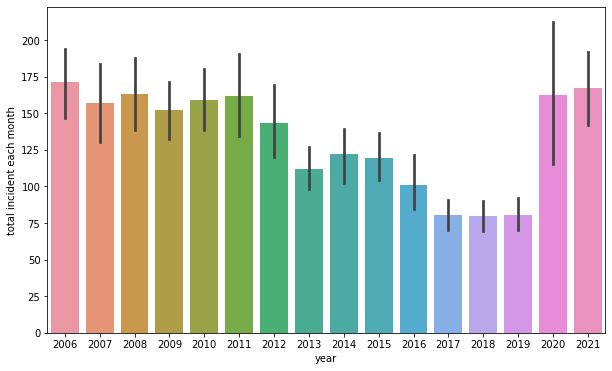

In [51]:
plt.figure(figsize=(10, 6))
yearplot = sns.barplot(y='total_incident', x='year', data=yearmonthdata)
yearplot.set(xlabel='year', ylabel='total incident each month')
plt.show()

###3.2.4 Plot Total incidents by month for different time period.

<Figure size 432x288 with 0 Axes>

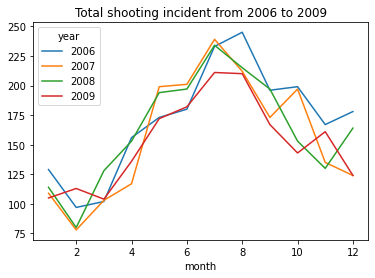

<Figure size 432x288 with 0 Axes>

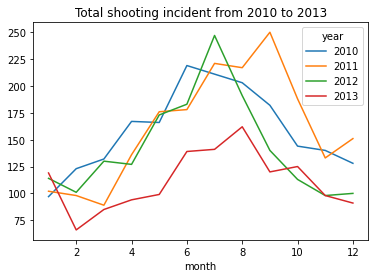

<Figure size 432x288 with 0 Axes>

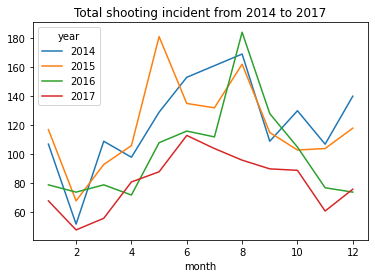

<Figure size 432x288 with 0 Axes>

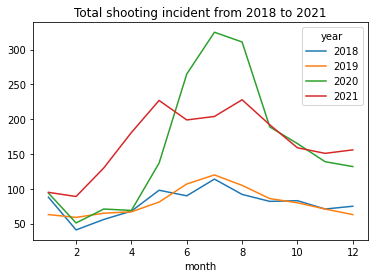

In [52]:
list1 = [2006,2007,2008,2009]
for i in range(0,4): 
  plotbymonth(6,4,list1)
  list1 = [x + 4 for x in list1]

## 3.3. Analysis by location.

###3.3.1 Get dataframe regarding location.

In [53]:
### Get separate dataframe for each location grouped by year
patroldf = (mydf[mydf['location'] == 'patrol'].groupby(["year"])["incident_key"]
         .agg([('patrol','count')])
         .reset_index())
housingdf = (mydf[mydf['location'] == 'housing'].groupby(["year"])["incident_key"]
         .agg([('housing','count')])
         .reset_index())
transitdf = (mydf[mydf['location'] == 'transit'].groupby(["year"])["incident_key"]
         .agg([('transit','count')])
         .reset_index())
### Merge dataframes based on year
locationdf = pd.merge((pd.merge(patroldf, housingdf, on='year')),transitdf, on='year')

###3.3.2 Bar chart of total incidents for each year for different location.

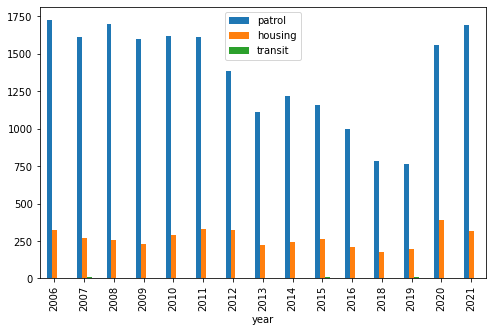

In [54]:
plt.rc('figure',figsize=(8,5))
locationdf.plot.bar(x="year")

##3.4 Analysis by Borough.

###3.4.1 Summary report regarding borough.

In [55]:
getsummary('boro', 'year')

bronx brooklyn manhattan  queens staten island
count   16.00    16.00     16.00   16.00         16.00
mean   462.62   647.81    204.06  239.25         46.00
std    122.00   177.24     67.69   61.08         10.96
min    267.00   357.00    105.00  144.00         25.00
25%    356.50   561.75    145.25  189.50         42.25
50%    512.00   641.00    196.00  251.00         49.50
75%    531.50   808.50    259.25  291.50         50.50
max    701.00   850.00    343.00  326.00         69.00

###3.4.2 Define function for pie chart for borough.

In [56]:
def pieboro(min,max):
    """Take min and max year to create pie chart for boro"""
    year1 = min
    year2 = max
    borodf = (mydf[mydf['year'].between(year1,year2)].groupby(["boro"])["incident_key"]
         .agg([('total','count')])
         .reset_index())
    borodf.set_index("boro").plot(kind="pie", autopct='%1.1f%%', y='total').legend().remove()
    plt.rc('figure',figsize=(6,6))
    plt.title(f'Total Incidents from {year1} to {year2} by Borough')
    plt.ylabel("")
    plt.show() 

###3.4.3 Pie chart for borough.

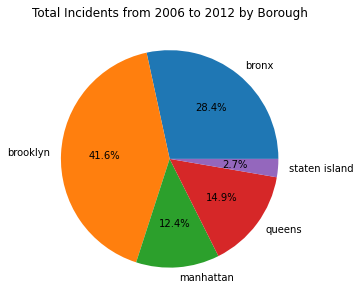

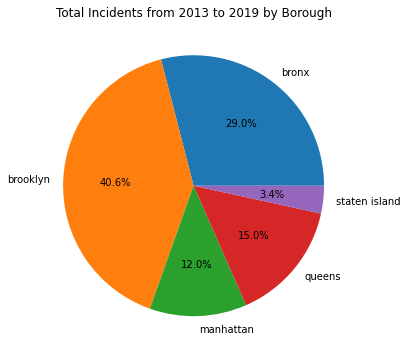

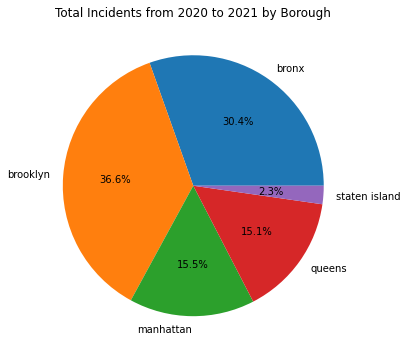

In [57]:
pieboro(2006,2012)
pieboro(2013,2019)
pieboro(2020,2021)

##3.5 Analysis of occur time.

###3.5.1 Summary report regarding occur time.

In [58]:
getsummary('occurtime', 'year')

day    night
count   16.00    16.00
mean   381.38  1218.38
std     97.96   326.58
min    235.00   702.00
25%    297.50  1005.75
50%    398.50  1387.00
75%    443.00  1475.50
max    578.00  1591.00

###3.5.2 Bar chart for each year for total incidents during daytime and at night. 

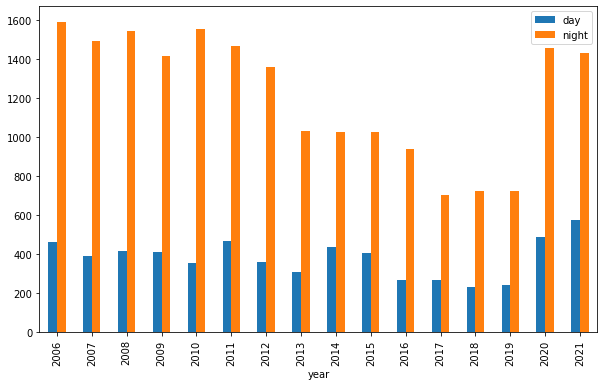

In [59]:
###Create two dataframes grouped by year and merge based on year.
daydf = (mydf[mydf['occurtime'] == 'day'].groupby(["year"])["incident_key"]
         .agg([('day','count')])
         .reset_index())
nightdf = (mydf[mydf['occurtime'] == 'night'].groupby(["year"])["incident_key"]
         .agg([('night','count')])
         .reset_index())
timedf = pd.merge(daydf,nightdf, on='year')
###Bar plot.
plt.rc('figure',figsize=(10,6))
timedf.plot.bar(x="year")

##3.6 Visualization regarding shooter's sex and vicim's sex.

###3.6.1 Define function for pie plot regarding sex.

In [60]:
def piesex(min,max):
    """Take min and max year to create pie chart for different combination of ['vic_sex','perp_sex']"""
    year1 = min
    year2 = max
    sexlist = ['m','f']
### Filter dataframes only containing ['m', 'f'] and group by year.
    sexdf = mydf[mydf['vic_sex'].isin(sexlist)]
    sexdf = sexdf[sexdf['perp_sex'].isin(sexlist)]
    sexdf = sexdf[sexdf['year'].between(year1,year2)]
    newsexdf = sexdf.groupby(['vic_sex','perp_sex'])["incident_key"].agg([('total','count')]).reset_index()
###Pie plot.
    newsexdf.set_index(['vic_sex', 'perp_sex']).plot(kind="pie", autopct='%1.1f%%', y='total').legend().remove()
    labels = ['female shot female', 'male shot female','female shot male','male shot male']
    plt.rc('figure',figsize=(6,6))
    plt.title(f'From {year1} to {year2}')
    plt.legend(labels,loc=3)
    plt.ylabel("")
    plt.show() 

###3.6.2 Pie plot for different time period. 

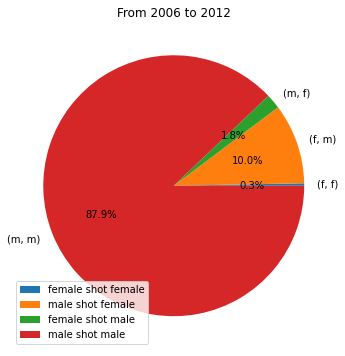

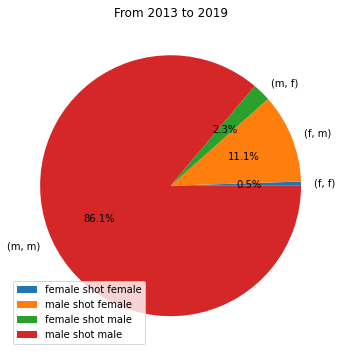

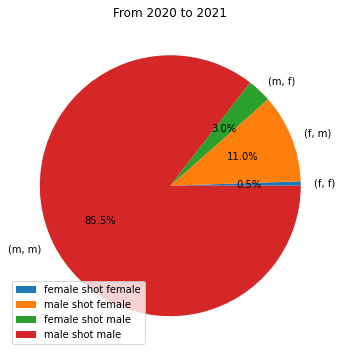

In [61]:
piesex(2006,2012)
piesex(2013,2019)
piesex(2020,2021)

##3.7 Analysis for total incidents for each age group of shoots and victims for different locations.

###3.7.1 Create new datasets after filtering, merging and recalculation.

In [62]:
###Filtering dataframe only containing values in lists below.
agedf = mydf.copy()
agelist = ['18-24','25-44','<18','45-64','65+']
locationlist = ['patrol', 'housing', 'transit']
agedf = agedf[agedf['perp_age_group'].isin(agelist)][agedf['vic_age_group'].isin(agelist)][agedf['location'].isin(locationlist)]

def getnewdataframe(column1,column2,df):
    """input dataframe as df, filter by column1, group by column2, output as lists containing mutiple dataframes"""
    output = []
    for value in df[column1].unique(): 
      df_value = df[df[column1] == value].groupby(column2)["incident_key"].agg([(value,'count')]).reset_index()
      output.append(df_value)
    return output
perdf = getnewdataframe('location','perp_age_group',agedf)
vicdf = getnewdataframe('location','vic_age_group',agedf)

def mergelist(mylist,column):
    """input list containing mutiple dataframe and column, output as new dataframe of all the dataframe merging on input column"""
    for i in (0, len(mylist)-2):
        if i == 0:
            mergeddf = pd.merge(mylist[i],mylist[i+1],on=column)
        else:
            mergeddf = pd.merge(mergeddf,mylist[i+1],on=column)
    return mergeddf

##Getting two new dataframes.
perdfmerge = mergelist(perdf,'perp_age_group')
vicdfmerge = mergelist(vicdf,'vic_age_group')

##Convert to percentage table
perdfpercent = perdfmerge.copy()
for value in perdfmerge.columns:
    if value != 'perp_age_group':
      perdfpercent[value] = round(perdfmerge[value]/perdfmerge[value].sum()*100,2)

vicdfpercent = vicdfmerge.copy()
for value in vicdfmerge.columns:
    if value != 'vic_age_group':
      vicdfpercent[value] = round(vicdfmerge[value]/vicdfmerge[value].sum()*100,2)

<ipython-input-62-77205c053fc3>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  agedf = agedf[agedf['perp_age_group'].isin(agelist)][agedf['vic_age_group'].isin(agelist)][agedf['location'].isin(locationlist)]


###3.7.2 Bar chart for both shooter and victim. 

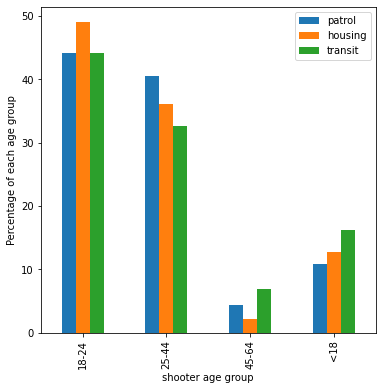

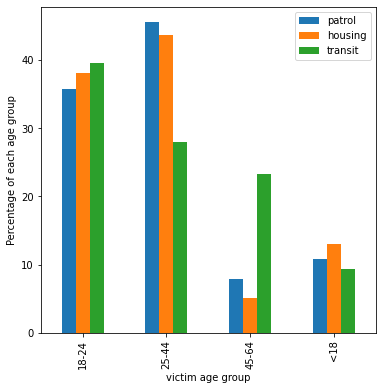

In [63]:
perdfpercent.plot.bar(x="perp_age_group")
plt.xlabel("shooter age group")
plt.ylabel('Percentage of each age group')
vicdfpercent.plot.bar(x="vic_age_group")
plt.xlabel("victim age group")
plt.ylabel('Percentage of each age group')
plt.show()

##3.8 Visualization of each incident on map.

###3.8.1 Define function for mapping each incident during a specific year.

In [64]:
mydfformap = dataframeShootingsince06.copy()
def mappingbyyear(a,b):
  """input a as year, b as dataframe"""
  year = a
  mydfformap = b
  mydfformap = mydfformap[mydfformap['year']==year]
  latitude =  np.float_(mydfformap.latitude.values.tolist())
  longitude =  np.float_(mydfformap.longitude.values.tolist())
  map_box = [-74.4331, -73.5267, 40.4673, 40.9270]
  map_img = plt.imread('map.png')  
  fig, ax = plt.subplots()
  ax.scatter(longitude, latitude)
  ax.set_ylim(map_box[2], map_box[3])
  ax.set_xlim(map_box[0], map_box[1])
  ax.imshow(map_img, extent=map_box, alpha=0.9)
  plt.title(f'Year: {year}')
  plt.rc('figure',figsize=(15,15))
  plt.savefig("mad_mod.png")
  plt.show()

###3.8.2 Mapping for different years.

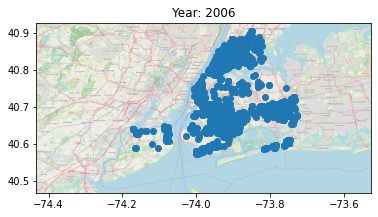

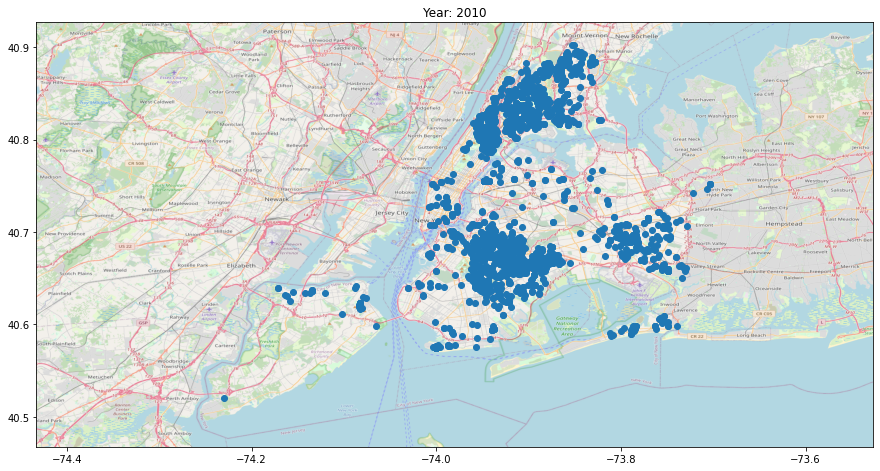

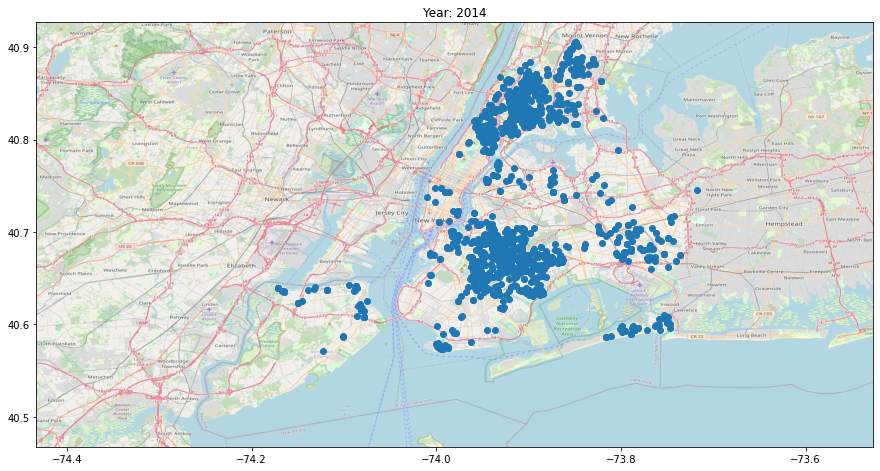

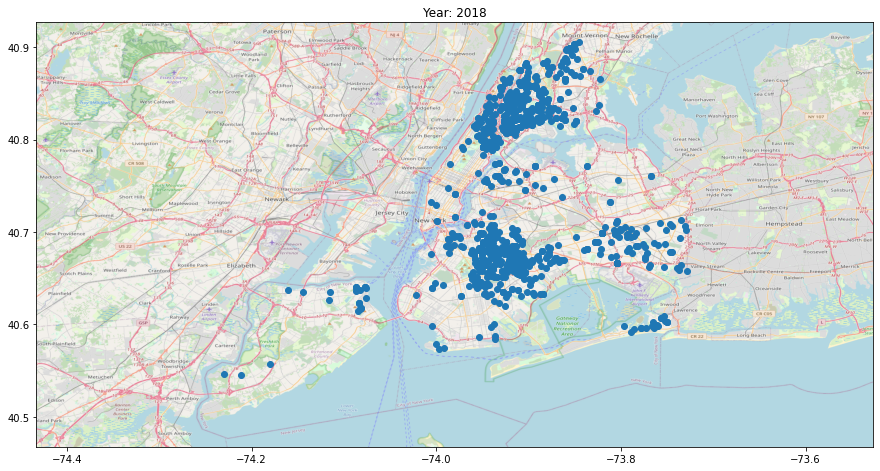

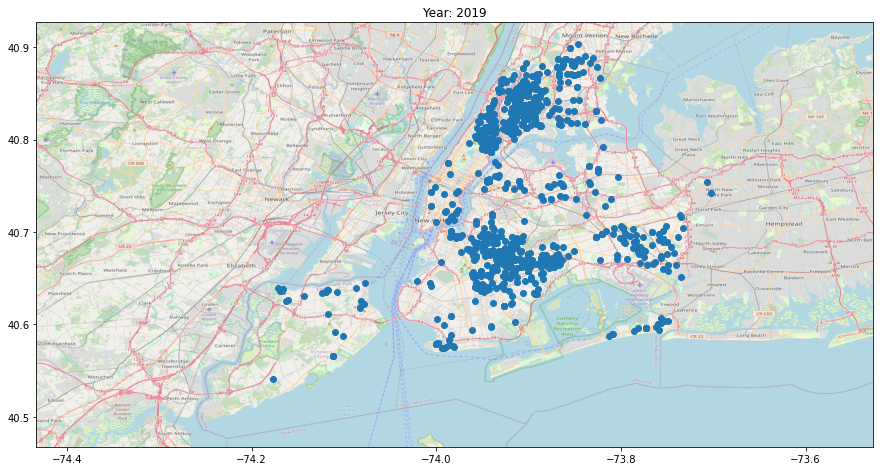

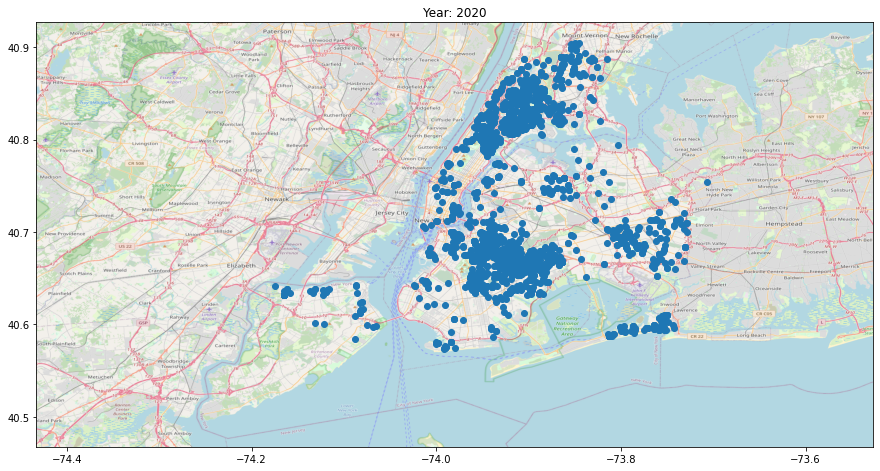

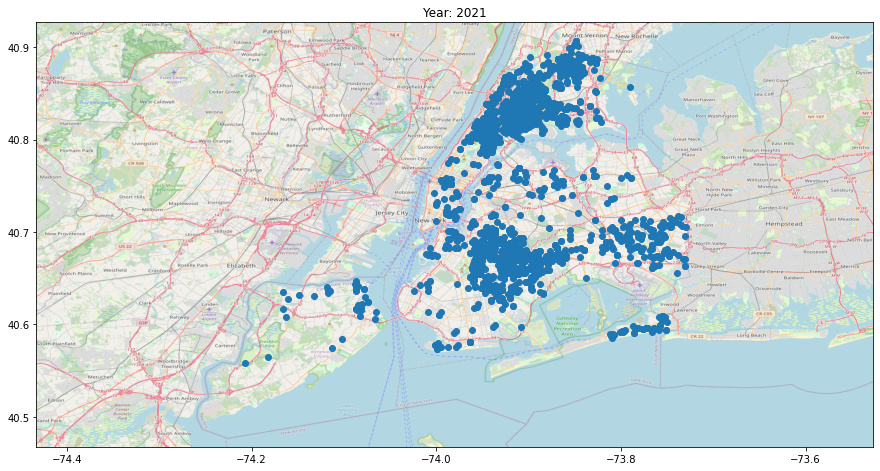

In [65]:
mappingbyyear(2006, mydfformap)
mappingbyyear(2010, mydfformap)
mappingbyyear(2014, mydfformap)
mappingbyyear(2018, mydfformap)
mappingbyyear(2019, mydfformap)
mappingbyyear(2020, mydfformap)
mappingbyyear(2021, mydfformap)

##3.9 Relation study of total incident against total complaint and total arrest.

###3.9.1 Create two dataframes for complaint and arrest.

In [66]:
dataframeComplaint = json2dataframe('https://data.cityofnewyork.us/resource/qgea-i56i.json', 500000)
dataframeArrest = json2dataframe('https://data.cityofnewyork.us/resource/8h9b-rp9u.json', 1500000)

###3.9.2 Cleaning the datas.

In [67]:
mydf2 = dataframeComplaint.copy()
mydf2 = mydf2[['cmplnt_num','cmplnt_fr_dt', "latitude","longitude"]]
mydf2['year'] = mydf2['cmplnt_fr_dt'].str[0:4] 
mydf3 = dataframeArrest.copy()
mydf3 = mydf3[['arrest_date', 'latitude','longitude']]
mydf3['year'] = mydf3['arrest_date'].str[0:4] 
mydf1 = dataframeShootingsince06.copy()

###3.9.3 Merge three datasets.

In [68]:
def getgroupbyyear(df,x,ylist):
  """input dataframe df and column name x and year list ylist to get dataframe count grouped by ["latitude","longitude"] in all years in ylist"""
  df = df[df['year'].isin(ylist)]
  df['latitude'] = df['latitude'].astype("float").dropna().apply('{:.2f}'.format)
  df['longitude'] = df['longitude'].astype("float").dropna().apply('{:.2f}'.format)
  df = (df.groupby(["latitude","longitude"])["year"]
          .agg([(x,'count')])
          .reset_index())
  return df
ylist1 = ['2016','2017']
ylist2 = [2016, 2017]
mydf1new = getgroupbyyear(mydf1,'total_incident',ylist2)
mydf2new = getgroupbyyear(mydf2,'total_complaint',ylist1)
mydf3new = getgroupbyyear(mydf3,'total_arrest',ylist1)
mergeddflinear = pd.merge((pd.merge(mydf1new, mydf2new, on=['latitude','longitude'])),mydf3new, on=['latitude','longitude'])

<ipython-input-68-a10fcafc490a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'] = df['latitude'].astype("float").dropna().apply('{:.2f}'.format)
<ipython-input-68-a10fcafc490a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'] = df['longitude'].astype("float").dropna().apply('{:.2f}'.format)


### 3.9.4 3D Scatter plot.

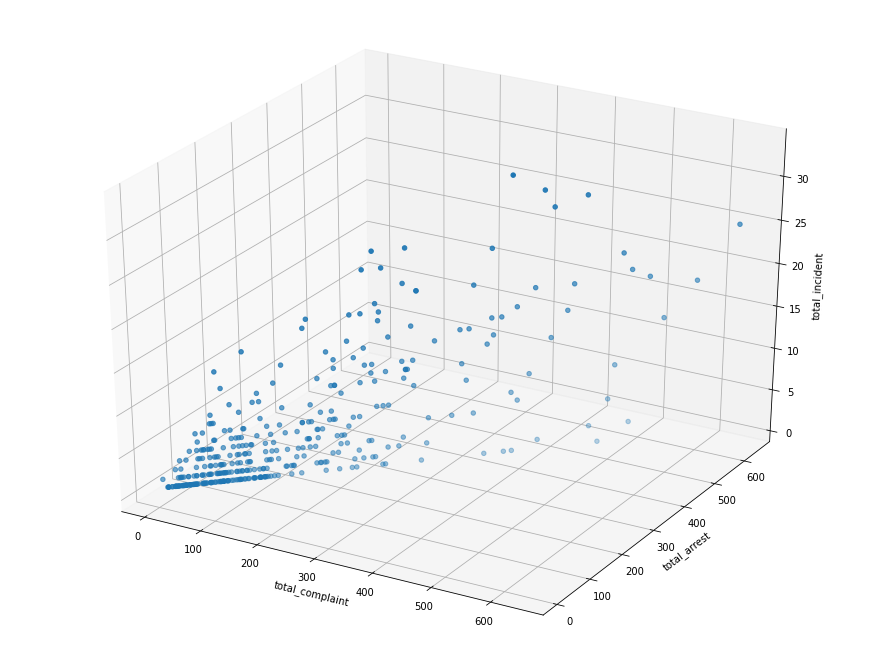

In [69]:
def create_3d_scatter(df,x1,x2,y):
    """Input dataframe, Y, X1 and X2 to create a 3d scatter plot"""
    fig = plt.figure(figsize=(12, 9))
    ax = Axes3D(fig)
    ax.scatter(df[x1], df[x1], df[y])
    ax.set_xlabel(x1)
    ax.set_ylabel(x2)
    ax.set_zlabel(y)
    plt.show()
    
create_3d_scatter(mergeddflinear,'total_complaint','total_arrest','total_incident')

### 3.9.5 Linear regression and fit the model

In [70]:
###Define X and y for our model
X = mergeddflinear[['total_complaint', 'total_arrest']]
y = mergeddflinear['total_incident']
###Fit the model
regr = linear_model.LinearRegression()
regr.fit(X, y)
###Show the regression coefficient
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
###Show the model summary
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

Intercept: 
 0.8319683972571381
Coefficients: 
 [0.03149004 0.00025458]
                            OLS Regression Results                            
Dep. Variable:         total_incident   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     137.3
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.40e-45
Time:                        05:16:56   Log-Likelihood:                -1139.1
No. Observations:                 382   AIC:                             2284.
Df Residuals:                     379   BIC:                             2296.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##3.10 Heat map of total cases based on zip code.

###3.10.1 Setup for converting to zip.

In [71]:
def get_zipcode(df, geolocator, lat_field, lon_field):
    try:
        location = geolocator.reverse((df[lat_field], df[lon_field]))
        return location.raw['address']['postcode']
    except (AttributeError, KeyError, ValueError):
        return None
geolocator = geopy.Nominatim(user_agent='andrewluoyu')
path = "ZIP_CODE_040114.shp"
gdf = gpd.read_file(path)

###3.10.2 Getting dataframes for heat maps.

In [72]:
### Create dataframes for total cases for shooting, complaint and arrest grouped by zipcode.
mydf1new1 = getgroupbyyear(mydf1,'total_incident',[2017])
mydf2new1 = getgroupbyyear(mydf2,'total_complaint',['2017'])
mydf3new1 = getgroupbyyear(mydf3,'total_arrest',['2017'])
mydf1new1['zipcodes'] = mydf1new1.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')
mydf2new1['zipcodes'] = mydf2new1.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')
mydf3new1['zipcodes'] = mydf3new1.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='latitude', lon_field='longitude')
mydf1new1 = mydf1new1.groupby(['zipcodes'])["total_incident"].agg([('total','sum')]).reset_index()
mydf2new1 = mydf2new1.groupby(['zipcodes'])["total_complaint"].agg([('total','sum')]).reset_index()
mydf3new1 = mydf3new1.groupby(['zipcodes'])["total_arrest"].agg([('total','sum')]).reset_index()
### Merging all datas.
df_merge_df1 = gdf.merge(mydf1new1,right_on ='zipcodes', left_on = 'ZIPCODE')
df_merge_df2 = gdf.merge(mydf2new1,right_on ='zipcodes', left_on = 'ZIPCODE')
df_merge_df3 = gdf.merge(mydf3new1,right_on ='zipcodes', left_on = 'ZIPCODE')

<ipython-input-68-a10fcafc490a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'] = df['latitude'].astype("float").dropna().apply('{:.2f}'.format)
<ipython-input-68-a10fcafc490a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'] = df['longitude'].astype("float").dropna().apply('{:.2f}'.format)


###3.10.3 Plots total cases by Zip

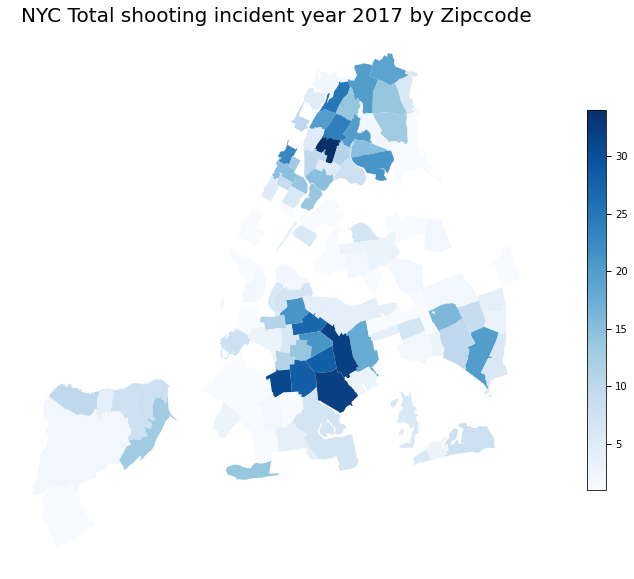

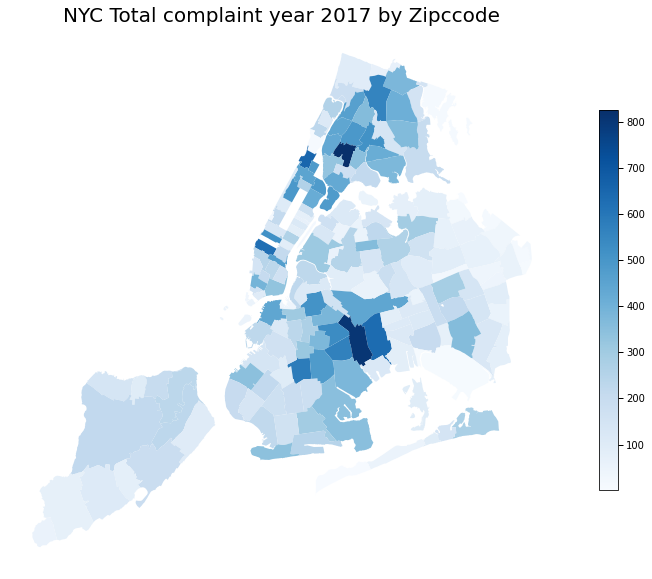

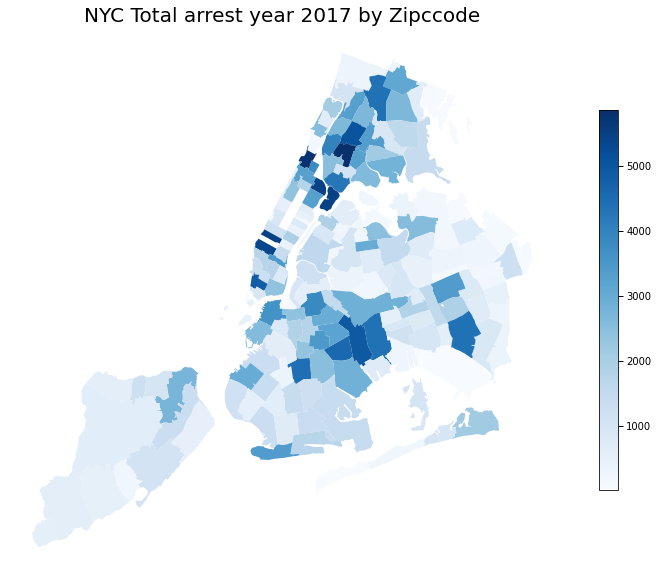

In [73]:
def getziplot(title,output,df):
    """Input title, output and dataframe to create heat map pic named as output and having title as input"""
    fig, ax = plt.subplots(figsize=(15,10))
    ax = df.plot(column = 'total', 
                            cmap='Blues', ax=ax,
                            legend=True,
                            legend_kwds={'shrink': 0.7})
    cb_ax = fig.axes[1]
    cb_ax.tick_params(labelsize=10,
                      direction='out', 
                      length=5, 
                      width=1,
                      grid_alpha=1)
    ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
    ax.set_axis_off()
    plt.savefig(output,format = 'png',bbox_inches='tight')
getziplot("NYC Total shooting incident year 2017 by Zipccode",'shooting2017zip.png',df_merge_df1)   
getziplot("NYC Total complaint year 2017 by Zipccode",'complain2017zip.png',df_merge_df2)
getziplot("NYC Total arrest year 2017 by Zipccode",'arrest2017zip.png',df_merge_df3)

#4. CLEAN DATA TO DATABASE.

##4.1 Filtering the data into a cleaner dataframe. The dimension of the final cleaned dataframe is (13019, 11).

In [81]:
###Getting unique value for each columns.
for column in mydf.columns:
    print(f"{column}: {mydf[column].unique()}")
###Filtering the data to remove useless value.
cleandf = mydf.copy()
agelist = ['18-24','25-44','<18','45-64','65+']
locationlist = ['patrol', 'housing', 'transit']
sexlist = ['m','f']
cleandf = cleandf[cleandf['perp_age_group'].isin(agelist)][cleandf['vic_age_group'].isin(agelist)][cleandf['location'].isin(locationlist)]
cleandf = cleandf[cleandf['vic_sex'].isin(sexlist)][cleandf['perp_sex'].isin(sexlist)].reset_index(drop=True)
cleandf.shape

(13019, 11)

##4.2 Check cleaned dataframe.

In [75]:
for column in cleandf.columns:
    print(f"{column}: {cleandf[column].unique()}")

incident_key: ['231008085' '230717903' '225295736' ... '77443443' '176027888'
 '218777493']
year: [2021 2013 2018 2006 2020 2012 2007 2010 2015 2009 2016 2019 2017 2014
 2011 2008]
month: [ 7  3  5  6  1  9  8 10 11  4  2 12]
occurtime: ['night' 'day']
location: ['patrol' 'housing' 'transit']
vic_age_group: ['25-44' '18-24' '<18' '45-64' '65+']
vic_sex: ['m' 'f']
perp_age_group: ['45-64' '<18' '25-44' '18-24' '65+']
perp_sex: ['m' 'f']
boro: ['brooklyn' 'manhattan' 'bronx' 'queens' 'staten island']
murder: [False  True]


##4.3 Create SQL database and test the database.

In [76]:
###Create SQL database.
conn = sqlite3.connect('CIS9650_Group8') 
c = conn.cursor()
cleandf.to_sql('shooting', conn, if_exists='replace', index = False)
###Test the database.
sql2df = sqla.create_engine('sqlite:///CIS9650_Group8')
pd.read_sql('SELECT * FROM shooting WHERE year between 2020 and 2021 AND boro = "brooklyn"', sql2df)

incident_key  year  month occurtime location vic_age_group vic_sex  \
0      231008085  2021      7     night   patrol         25-44       m   
1      230717903  2021      7     night   patrol         25-44       m   
2      225295736  2021      3       day   patrol         25-44       m   
3      222990833  2021      1     night   patrol         18-24       m   
4      226450222  2021      4       day  housing         18-24       m   
..           ...   ...    ...       ...      ...           ...     ...   
541    217406111  2020      9     night  housing         25-44       m   
542    220408103  2020     11       day   patrol         25-44       m   
543    213471601  2020      5     night   patrol         25-44       m   
544    221891164  2020     12     night   patrol         25-44       m   
545    214693791  2020      6     night  housing         18-24       m   

    perp_age_group perp_sex      boro  murder  
0            45-64        m  brooklyn       0  
1              <18        m  brooklyn       0  
2            25-44        m  brooklyn       1  
3            18-24        m  brooklyn       0  
4            18-24        m  brooklyn       0  
..             ...      ...       ...     ...  
541          18-24        m  brooklyn       0  
542          25-44        m  brooklyn       0  
543          25-44        m  brooklyn       1  
544          25-44        m  brooklyn       1  
545          18-24        m  brooklyn       0  

[546 rows x 11 columns]

#5. USE OF THE DATA. (Desicion Tree)

##5.1 Transfer catagory data to numeric data.

In [77]:
cleandfforml = cleandf.copy()
def transfer(df,column):
  i = 0
  for value in df[column].unique():
    df[column] = df[column].replace(value,i)
    i += 1
  return df
for column in cleandfforml.columns:
  cleandfforml = transfer(cleandfforml,column)

##5.2 Conduct training dataset and testing dataset.

In [78]:
features = ['occurtime', 'location',
       'vic_age_group', 'vic_sex', 'perp_age_group', 'perp_sex']
X = cleandfforml[features]
y = cleandfforml['murder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

##5.3 Fit the training dataset.

In [79]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf = clf.fit(X_train, y_train)

##5.4 Apply the algorithm to the testing dataset.

Accuracy: 0.7769585253456222


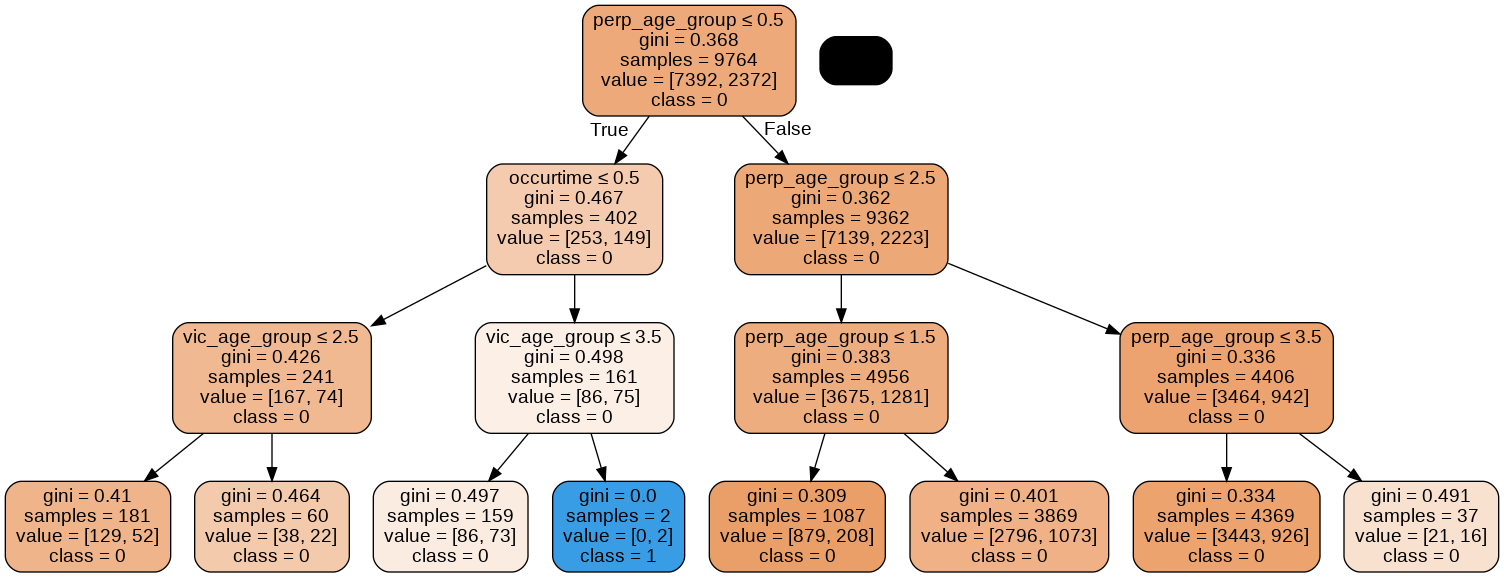

In [80]:
###Gain the accuracy.
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
###Plot the decision tree.
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('shootingdecisiontree.png')
Image(graph.create_png())